Green layer of input photo.


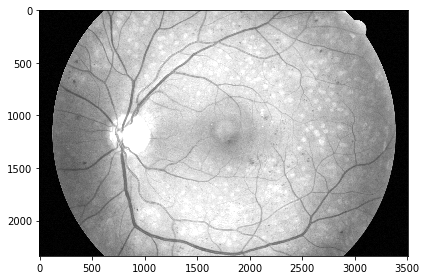

In [1]:
import os.path as path
import numpy
import skimage
from skimage import exposure
from skimage import img_as_ubyte
from skimage import io

io.use_plugin('matplotlib', 'imshow')
io.use_plugin('matplotlib', 'imread')

test_image_name = '01_dr'


def rescale(image):
    b, u = numpy.percentile(image, (2, 98))
    return skimage.exposure.rescale_intensity(image, in_range=(b, u))


def load_eye_photo(img_name):
    return img_as_ubyte(io.imread(path.join('images', f'{img_name}.jpg')))


def load_manual_expert_mask(name):
    return img_as_ubyte(io.imread(path.join('manual1', f'{name}.tif')))


def load_outline_mask(name):
    return img_as_ubyte(io.imread(path.join('mask', f'{name}_mask.tif')))


img = load_eye_photo(test_image_name)
img_green = img[:, :, 1]
img_green = rescale(img_green)

print("Green layer of input photo.")
io.imshow(img_green)

Mask created by classificator.


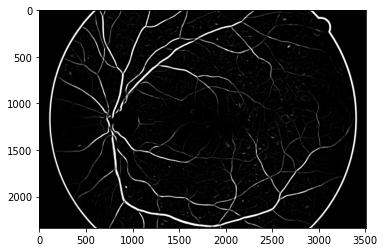

In [2]:
import matplotlib.pyplot as plt
from skimage.filters import frangi, gaussian

img_filtered_float = frangi(gaussian(img_green.copy()))
img_filtered = img_as_ubyte(rescale(img_filtered_float))

print("Mask created by classificator.")
plt.imshow(img_filtered, vmin=0, vmax=255, cmap=plt.cm.gray)

In [10]:
outline_mask = load_outline_mask(test_image_name)

# img_filtered = numpy.subtract(img_filtered, )

# print("Mask without outline.")
# io.imshow(outline_mask, vmin=0, vmax=255, cmap=plt.cm.gray)

ValueError: <COMPRESSION.LZW: 5> requires the 'imagecodecs' package

In [ ]:
from skimage.filters import threshold_mean

img = img_filtered
thresh = threshold_mean(img)
img = numpy.where(img > thresh, True, False)

from skimage.morphology import remove_small_objects

img = remove_small_objects(img, min_size=20000)

img = numpy.where(img == True, 255, 0)

print("Better quality mask created by classificator.")
io.imshow(img, vmin=0, vmax=255, cmap=plt.cm.gray)

Mask created by doctor manually - ground truth.


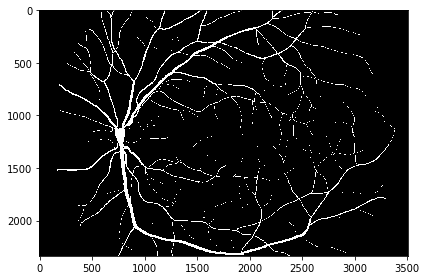

In [8]:

img_expert = load_manual_expert_mask(test_image_name)
print("Mask created by doctor manually - ground truth.")
io.imshow(img_expert, vmin=0, vmax=255, cmap=plt.cm.gray)

In [ ]:


ground_truth = img_expert.flatten().tolist()
classifier_result = img.flatten().tolist()

from sklearn import metrics

confusion = metrics.confusion_matrix(ground_truth, classifier_result)

print(confusion)

# true positives / negatives
# false positives / negatives
TN, FP = confusion[0, 0], confusion[0, 1]
FN, TP = confusion[1, 0], confusion[1, 1]

accuracy = float(TP + TN) / float(TP + TN + FP + FN)
sensitivity = float(TP) / float(TP + FN)
specificity = float(TN) / float(TN + FP)
print("accuracy", accuracy)
print("sensitivity", sensitivity)
print("specificity", specificity)